In [2]:
import pandas as pd
import numpy as np

## Dataset

In [3]:
df = pd.read_csv("apple_quality.csv")
display(df.head(2), df.sample(2), df.tail(2))

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.32984,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.86753,-0.722809367,good


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3625,3625.0,-1.641648,1.742168,-4.940530,1.607117,-1.458743,2.644386,1.594064952,bad
965,965.0,-4.786532,0.524410,-2.730308,-0.035859,-0.071000,3.453096,-1.334654393,bad


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3999,3999.0,0.27854,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [4]:
df = df[:-1].drop(columns={"A_id"})
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [5]:
# Dataset Information
display(df.describe(),
pd.DataFrame({
    'feature': df.columns.values,
    'dtypes': [df[col].dtype for col in df.columns],
    'n_unique': df.nunique().values,
    'n_nan': [df[col].isna().sum() for col in df.columns],
    'n_dupe': [df.duplicated().sum() for row in df.columns],
    'sample_unique': [df[col].unique() for col in df.columns]
    })
)
print(f'''
      Total Columns that having missing value = {df.isnull().any().sum()}
      Total Columns that are clean            = {df.shape[1] - df.isnull().any().sum()}
      Total Rows that having missing value    = {df.isnull().sum().sum()}
      Total Rows                              = {df.shape[0]}
      Totol Percentage of missing value      = {(df.isnull().sum().sum()/np.product(df.shape)) * 100}
      ''')

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


,feature,dtypes,n_unique,n_nan,n_dupe,sample_unique
0,Size,float64,4000,0,0,"[-3.970048523, -1.195217191, -0.292023862, -0...."
1,Weight,float64,4000,0,0,"[-2.512336381, -2.839256528, -1.351281995, -2...."
2,Sweetness,float64,4000,0,0,"[5.346329613, 3.664058758, -1.738429162, 1.324..."
3,Crunchiness,float64,4000,0,0,"[-1.012008712, 1.588232309, -0.342615928, -0.0..."
4,Juiciness,float64,4000,0,0,"[1.844900361, 0.853285795, 2.838635512, 3.6379..."
5,Ripeness,float64,4000,0,0,"[0.329839797, 0.867530082, -0.038033328, -3.41..."
6,Acidity,object,4000,0,0,"[-0.491590483, -0.722809367, 2.621636473, 0.79..."
7,Quality,object,2,0,0,"[good, bad]"



      Total Columns that having missing value = 0
      Total Columns that are clean            = 8
      Total Rows that having missing value    = 0
      Total Rows                              = 4000
      Totol Percentage of missing value      = 0.0
      


In [6]:
# ReType
df["Acidity"] = df['Acidity'].astype(float)

In [7]:
# Outliers
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
def find_anomalies(data, column_name):
    q1, q3 = data.quantile([0.25, 0.75])
    iqr = q3 - q1
    limit = iqr * 1.5
    bot = q1 - limit
    top = q3 + limit
    outliers_count = ((data < (bot)) | (data > (top))).sum()

    result = pd.DataFrame({
        'Column': [column_name],
        'IQR': [iqr],
        'Lower Bound': [bot],
        'Upper Bound': [top],
        'Outliers': [outliers_count]
    })
    return result

df_outliers = pd.DataFrame(columns=['Column', 'IQR', 'Lower Bound', 'Upper Bound', 'Outliers'])

for column in numeric_columns:
    result = find_anomalies(df[column], column)
    df_outliers = pd.concat([df_outliers, result], ignore_index=True)
    
# Remove Outliers
for i,low,up in zip(df_outliers.Column.unique(),df_outliers["Lower Bound"].unique(),df_outliers["Upper Bound"].unique()):
    df = df[(df[i] >= low) & (df[i] <= up)]

display(df_outliers)
print(f"Numbers of Outliers Removed : {df_outliers['Outliers'].sum()}")

C:\Users\Utente\AppData\Local\Temp\ipykernel_7136\2631605100.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_outliers = pd.concat([df_outliers, result], ignore_index=True)


,Column,IQR,Lower Bound,Upper Bound,Outliers
0,Size,2.622291,-5.750201,4.738963,22
1,Weight,2.042747,-5.075890,3.095097,54
2,Sweetness,2.540347,-5.548946,4.612442,32
3,Crunchiness,1.831470,-2.684440,4.641439,47
4,Juiciness,2.637262,-4.757179,5.791870,32
5,Ripeness,2.537889,-4.578510,5.573044,24
6,Acidity,2.887917,-5.709299,5.842368,20


Numbers of Outliers Removed : 231


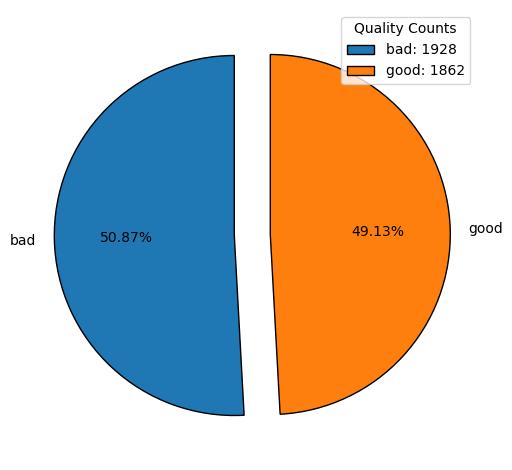

In [8]:
import matplotlib.pyplot as plt
# Good & Bad Sample Comparation
quality_counts = df['Quality'].value_counts()

plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.2f%%',  explode=(0.1, 0.1), startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})

legend_labels = [f'{index}: {count}' for index, count in zip(quality_counts.index, quality_counts)]
plt.legend(legend_labels, title='Quality Counts', loc='upper right')
plt.tight_layout()
plt.show()

In [9]:
# Encode
df['Quality'] = df['Quality'].map({'bad': -1, 'good': 1})
df.sample(5)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
86,1.889652,-1.234885,-2.003227,1.618220,0.360724,2.712214,0.124914,1
1356,2.958601,0.374302,-2.620356,-0.564812,-0.208029,1.950718,1.514155,1
719,-1.265105,0.330938,0.586008,1.727311,0.371202,-3.324980,0.369161,1
699,-0.799594,-0.501725,2.197018,-0.177495,1.263452,0.633092,-1.501630,1
1704,-2.301198,-0.754344,-1.812051,-0.064832,1.429055,2.404385,-0.376804,-1


## Train dataset

In [10]:
# Train Test Split
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
X = df.drop("Quality", axis=1)
y = df["Quality"]

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print(f"""
X_train = {X_train.shape}
X_test = {X_test.shape}""")


X_train = (3084, 7)
X_test = (772, 7)


In [11]:
X_train.to_csv("apple_X_train.csv", index=False)
X_test.to_csv("apple_X_test.csv", index=False)
y_train.to_csv("apple_y_train.csv", index=False)
y_test.to_csv("apple_y_test.csv", index=False)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7240932642487047


In [14]:
w_star = np.insert(lr.coef_, 0, np.array(lr.intercept_))
print(w_star)

[-6.50626041  5.84001997  1.7156128   5.06737372 -0.08959093  4.16379647
 -1.3176861  -2.58444273]


### Single feature model

In [18]:
# Train Test Split
from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
X = df.drop("Quality", axis=1)
#X = pd.DataFrame(X[["Size", "Weight"]])
y = df["Quality"]

In [19]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"""
X_train = {X_train.shape}
X_test = {X_test.shape}""")


X_train = (302, 7)
X_test = (76, 7)


In [20]:
# Import model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7763157894736842


In [21]:
w_star = np.insert(lr.coef_, 0, np.array(lr.intercept_))
print(w_star)

[-3.97234922  4.26360974  0.20499547  2.59368885  0.54940743  1.83380268
 -0.23547074 -1.35549975]


In [ ]:
X_train["Cost"] = np.ones(X_train.shape[0])
X_train.T

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train["Size"].values, y_train.values)
plt.scatter(X_train["Size"].values, 1 / (1 + np.exp(- np.dot(w_star.T, X_train.values.T))))
plt.show()

In [ ]:
# Generate a neighbour point
eps = 0.1
w_bar = w_star + np.array([0.5,-0.5,0,0,0,-0.08,0.5,-0.7])
print(np.linalg.norm(w_star - w_bar))
print(w_bar)

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred)